In [2]:
import elevation
import pickle
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
homedir = '/home/marianne/Documents/snow_fires/'
os.chdir(homedir)
# homedir = '/global/home/users/cowherd/'
# datadir = 'global/scratch/users/cowherd/'

In [15]:
## load fire data
wgs_crs = 'epsg:4326'
rawdatadir = '/home/marianne/Documents/data/'
datadir = '/home/marianne/Documents/snow_fires/data/'

# wfigs 2021 fires perimeters
wfigs21 = gpd.read_file(rawdatadir + 'InteragencyPerimeters2021/FH_Perimeter.shp').to_crs(wgs_crs)
# interagency historic record fire preimeters
fires_allyears = gpd.read_file(rawdatadir + 'Interagency_Fire_Perimeter_History/InteragencyFirePerimeterHistory.shp').to_crs(wgs_crs)

gages_metadata = gpd.read_file(rawdatadir + 'snow_fires_data/gages_metadata.gdf').to_crs(wgs_crs)
fires_allyears = gpd.read_file(rawdatadir + 'snow_fires_data/fires_allyears.gdf').to_crs(wgs_crs)
bas_all = gpd.read_file(rawdatadir + 'snow_fires_data/bas_all.gdf').to_crs(wgs_crs)
gaged_basins_gdf = gpd.read_file(rawdatadir + 'snow_fires_data/gaged_basins_gdf.gdf').to_crs(wgs_crs)
snowzone = gpd.read_file(rawdatadir + 'snowzone/snowzone.shp').to_crs(wgs_crs)

gaged_basins = gpd.read_file('/home/marianne/snow_fires_data/gaged_basins_gdf.gdf')

    
with open(datadir + 'streamflow_metadata.pickle', 'rb') as handle:
    streamflow_metadata = pickle.load(handle)
gages = list(gaged_basins.GAGE_ID)

In [88]:
2.252690e+09	

2252690000.0

In [87]:
bas_ref

,AREA,PERIMETER,GAGE_ID,geometry
0,2.252690e+09,516060.0,01013500,"POLYGON ((2050770.000 2982930.000, 2050770.000..."
1,1.003230e+07,18600.0,01017550,"POLYGON ((2123775.000 2941755.000, 2123745.000..."
2,1.610010e+07,27660.0,01021470,"POLYGON ((2201445.000 2750235.000, 2201445.000..."
3,7.673850e+07,67980.0,01021480,"POLYGON ((2183205.000 2776125.000, 2183175.000..."
4,1.619920e+08,126240.0,01022260,"POLYGON ((2198865.000 2739555.000, 2198895.000..."
...,...,...,...,...
2052,7.939520e+08,218220.0,06280300,"POLYGON ((-1104450.000 2406630.000, -1104480.0..."
2053,1.629860e+08,92400.0,06632400,"POLYGON ((-848325.000 2106675.000, -848355.000..."
2054,3.983090e+08,166380.0,09210500,"POLYGON ((-1190715.000 2245455.000, -1190685.0..."
2055,7.164230e+08,156740.0,10308200,"POLYGON ((-2037620.625 1999732.625, -2037620.2..."


In [ ]:
for id in gages:
    basin = gaged_basins[gaged_basins.GAGE_ID == id]
    bounds = basin.geometry.bounds

    latmin = bounds.miny.values[0]
    latmax = bounds.maxy.values[0]
    lonmin = bounds.minx.values[0]
    lonmax = bounds.maxx.values[0]

    print('!eio clip -o dem'+str(id)+'.tif --bounds '+ str(lonmin) + ' ' + str(latmin) + ' ' + str(lonmax) + ' ' + str(latmax))

In [ ]:
os.chdir(homedir +'data/dem/')
!eio clip -o dem05014500.tif --bounds -113.77394464221702 48.71008801669661 -113.64630699916023 48.851002748529034
!eio clip -o dem06019500.tif --bounds -112.4650866597716 44.784965481036885 -111.81275988154604 45.21487562087144
!eio clip -o dem06043500.tif --bounds -111.53092948419298 44.84995986216555 -110.87022765659911 45.548660864255766
!eio clip -o dem06093200.tif --bounds -113.23796400201408 48.121045402543885 -112.79266779215986 48.39260307795913
!eio clip -o dem06192500.tif --bounds -111.12244765279094 43.945668159872056 -109.72276290462634 45.60477531086846
!eio clip -o dem06224000.tif --bounds -109.63103811281545 42.93862795338645 -109.19805002465974 43.19588365022232
!eio clip -o dem06280300.tif --bounds -109.87711598504575 43.80206784620534 -109.44275505890577 44.2234263264248
!eio clip -o dem06289000.tif --bounds -107.86520050339121 44.76567179490135 -107.50270488120259 45.006936538354495
!eio clip -o dem06298000.tif --bounds -107.75796959531321 44.594945886672605 -107.30211448714562 44.86804220305817
!eio clip -o dem06311000.tif --bounds -107.12693224776694 44.02079343051311 -107.04035543023413 44.15598526325529
!eio clip -o dem06422500.tif --bounds -103.74943610016393 44.12514998094401 -103.43313454991669 44.2716732892407
!eio clip -o dem06622700.tif --bounds -106.5292611618359 41.34673559028274 -106.35162637408614 41.44911811074987
!eio clip -o dem06623800.tif --bounds -106.834773513997 40.870835080129666 -106.67599613961558 41.06412691498589
!eio clip -o dem07207500.tif --bounds -105.25776748953169 36.56220026655548 -104.94448372932469 36.8493553651228
!eio clip -o dem07215500.tif --bounds -105.55768286364606 35.91274698323251 -105.24334380509268 36.2768359013343
!eio clip -o dem08267500.tif --bounds -105.55902857426968 36.530466278133304 -105.41426619730352 36.637186255160195
!eio clip -o dem08271000.tif --bounds -105.53217776674784 36.48990427603355 -105.39494594301775 36.54889325294267
!eio clip -o dem08279000.tif --bounds -105.9244921501737 35.9721933113693 -105.39237903106874 36.25954509405369
!eio clip -o dem08291000.tif --bounds -105.90852121298181 35.8607752079392 -105.63713815048735 35.9976473944784
!eio clip -o dem08324000.tif --bounds -106.87249541494273 35.665897480252646 -106.39550689581797 36.123710200992605
!eio clip -o dem08378500.tif --bounds -105.76490074307641 35.69762695760763 -105.4864534000879 35.98214783988105
!eio clip -o dem08380500.tif --bounds -105.5542790772483 35.64105859919427 -105.31137203577411 35.81262657775859
!eio clip -o dem09026500.tif --bounds -105.96559429316692 39.79467292627071 -105.85402450672265 39.92111386522177
!eio clip -o dem09036000.tif --bounds -106.08225152585302 39.68380182394475 -105.88035723665297 39.87502770258122
!eio clip -o dem09059500.tif --bounds -106.6079200300369 39.667036120325164 -106.29209092463726 39.82527930478927
!eio clip -o dem09065500.tif --bounds -106.27944273726156 39.60240842957868 -106.1759259912628 39.66345268750835
!eio clip -o dem09066200.tif --bounds -106.33377207842443 39.64762573221101 -106.2910073394187 39.70587441374088
!eio clip -o dem09081600.tif --bounds -107.38036904841204 38.9847346310961 -106.98647602089454 39.241166481468014
!eio clip -o dem09124500.tif --bounds -107.591033763406 37.83540425871383 -107.17931250567719 38.30428300268031
!eio clip -o dem09210500.tif --bounds -110.64861987814699 42.010087671115805 -110.4154775680488 42.42241040232138
!eio clip -o dem09223000.tif --bounds -110.81238189048109 42.104779956875596 -110.62593628013022 42.370015743183586
!eio clip -o dem09255000.tif --bounds -107.45410027341971 40.76367384349209 -107.0648419095482 40.98910572668983
!eio clip -o dem09266500.tif --bounds -109.88468389095341 40.57662392162005 -109.59613280995464 40.803724013997694
!eio clip -o dem09277500.tif --bounds -111.18782773199322 40.27650485505134 -110.59653170374496 40.72923271044274
!eio clip -o dem09289500.tif --bounds -110.65666082017731 40.601581792288755 -110.47232531405604 40.780223299589814
!eio clip -o dem09292500.tif --bounds -110.50668245973041 40.50893812288592 -110.30438711367755 40.79229548471928
!eio clip -o dem09312600.tif --bounds -111.14323642571998 39.86579288777717 -110.95889031582855 40.047186312454784
!eio clip -o dem09342500.tif --bounds -107.08411375304267 37.261782088540826 -106.64145738058001 37.57151753513879
!eio clip -o dem09404450.tif --bounds -112.70289051320948 37.3360344328816 -112.46979500891797 37.49690344193142
!eio clip -o dem09430600.tif --bounds -108.68649923629361 33.15732978849374 -108.42914621480301 33.30640932530188
!eio clip -o dem09492400.tif --bounds -109.81600373223772 33.816108221048474 -109.5623596620018 33.92116063909423
!eio clip -o dem09496500.tif --bounds -110.67296051907262 33.98472922432142 -109.8328781207636 34.30736670924534
!eio clip -o dem09497800.tif --bounds -110.68490044600858 33.84207496162404 -110.34290164935976 34.248546293371895
!eio clip -o dem09497980.tif --bounds -110.99994638827486 33.818010127410965 -110.76796229788985 34.24178883418536
!eio clip -o dem09499000.tif --bounds -111.50070439499241 33.92497126049582 -110.82224022142623 34.40526622565554
!eio clip -o dem09504500.tif --bounds -111.92086589934526 34.7642169420028 -111.51063134105674 35.15155414335382
!eio clip -o dem09505200.tif --bounds -111.6791413773149 34.58500478012024 -111.39064202344667 34.83260251393356
!eio clip -o dem09505350.tif --bounds -111.80049236781431 34.725960647825794 -111.4509519182084 34.92949735748574
!eio clip -o dem09505800.tif --bounds -111.69625906931545 34.449313060688645 -111.2610032950456 34.8019097746986
!eio clip -o dem09507980.tif --bounds -111.65045862106662 34.14586196511878 -111.13678132188355 34.45696857773177
!eio clip -o dem09508300.tif --bounds -111.69969765908668 34.12004691410617 -111.48355656943028 34.23245501688412
!eio clip -o dem09510200.tif --bounds -111.57447816216239 33.66578429920935 -111.37150021973382 34.00652090694172
!eio clip -o dem10032000.tif --bounds -110.91575283850037 42.278668917215036 -110.63427870599769 42.605429524739165
!eio clip -o dem10109000.tif --bounds -111.78635459802896 41.709894586299846 -111.47151447013835 42.094086764396316
!eio clip -o dem10150500.tif --bounds -111.72210952054756 39.698788229666285 -111.08198320004851 40.26641151170598
!eio clip -o dem10173450.tif --bounds -112.84136586315198 37.559501123283226 -112.50937244926659 37.71405658124601
!eio clip -o dem10194200.tif --bounds -112.52263769484959 38.40161388577114 -112.28606369377319 38.68795784457727
!eio clip -o dem10205030.tif --bounds -111.58744709084765 38.90692140931693 -111.44027618605828 39.079126117258475
!eio clip -o dem10215900.tif --bounds -111.58497161300983 39.20828713665518 -111.44258580635352 39.29649858578626
!eio clip -o dem10242000.tif --bounds -113.04781369349733 37.54539278035575 -112.82175834691834 37.69711078074622
!eio clip -o dem10263500.tif --bounds -117.87140412867342 34.3396433638219 -117.74852813011088 34.42152537045993
!eio clip -o dem10296500.tif --bounds -119.65160919210258 38.13661428788469 -119.303310895598 38.53082385115953
!eio clip -o dem10308200.tif --bounds -119.93272018450676 38.35389814332128 -119.54192155831198 38.74202109715554
!eio clip -o dem10310000.tif --bounds -119.99389257327557 38.6392626063716 -119.83364844896838 38.862395258989956
!eio clip -o dem10316500.tif --bounds -115.48409735367329 40.58471654628064 -115.35673184279824 40.691094759471305
!eio clip -o dem10336660.tif --bounds -120.25257521646016 39.060637471714344 -120.159710194687 39.12683382844704
!eio clip -o dem10336676.tif --bounds -120.24780948145495 39.111422586852065 -120.15522026227787 39.16215008379801
!eio clip -o dem10336780.tif --bounds -120.00453930914317 38.80785943936881 -119.87678478394258 38.92245273451596
!eio clip -o dem10343500.tif --bounds -120.31668910846946 39.40390401351839 -120.23403336296586 39.4608253231988
!eio clip -o dem10396000.tif --bounds -118.90985135085211 42.48926175016783 -118.56109883041577 42.79239372217073
!eio clip -o dem11055800.tif --bounds -117.22183827953391 34.14225575594465 -117.12734903907351 34.23654616554071
!eio clip -o dem11062001.tif --bounds -117.64649419689891 34.202037647244445 -117.45177242899815 34.333491134960255
!eio clip -o dem11113500.tif --bounds -119.14548563951479 34.393328270924904 -119.00603185462953 34.51553375197156
!eio clip -o dem11124500.tif --bounds -119.9165299393203 34.594115572207315 -119.66831811886914 34.71328991400794
!eio clip -o dem11132500.tif --bounds -120.48136006543172 34.5000800689192 -120.25973558173133 34.6017857817663
!eio clip -o dem11143000.tif --bounds -121.77450334718533 36.17728232801755 -121.5902419289277 36.30214692841565
!eio clip -o dem11152000.tif --bounds -121.6387931768767 36.0722991432242 -121.29712299771818 36.408116267617636
!eio clip -o dem11176400.tif --bounds -121.70375530535252 37.28616859742088 -121.40661322041763 37.57374203212001
!eio clip -o dem11186000.tif --bounds -118.64476793652003 35.91245015780058 -118.20946901786306 36.70063011145055
!eio clip -o dem11200800.tif --bounds -118.82328959785146 35.848262615462794 -118.56681312191023 35.976923236737434
!eio clip -o dem11230500.tif --bounds -118.981136660717 37.277474314338086 -118.76794884993397 37.399548183756536
!eio clip -o dem11315000.tif --bounds -120.21970638629675 38.51599764525804 -120.08203938627572 38.617394678339316
!eio clip -o dem11316800.tif --bounds -120.45454617854108 38.39745737868956 -120.19269818947438 38.4484231548067
!eio clip -o dem11367500.tif --bounds -122.20054716256979 41.16694874558513 -121.7629799293968 41.518882761466585
!eio clip -o dem11379500.tif --bounds -122.8141461023779 39.91562033527852 -122.5085424212147 40.06404345470005
!eio clip -o dem11381500.tif --bounds -122.02454875323814 40.047782150031196 -121.47281953979572 40.4860531956759
!eio clip -o dem11383500.tif --bounds -121.94869157706408 40.00440022944946 -121.34250741789288 40.3654349157494
!eio clip -o dem11427700.tif --bounds -120.5106910698241 39.12684327160094 -120.4164405018595 39.19095362100977
!eio clip -o dem11449500.tif --bounds -122.87132045342824 38.801634955294126 -122.68091345412967 38.92951231271306
!eio clip -o dem11451100.tif --bounds -122.84752508001304 39.14085240863933 -122.61857984393185 39.26026331264407
!eio clip -o dem11468000.tif --bounds -123.67243625930816 38.81115847489292 -123.18901483004365 39.2521144752098
!eio clip -o dem11468500.tif --bounds -123.73813688912102 39.341983067159845 -123.4063881848271 39.51497457933813
!eio clip -o dem11469000.tif --bounds -124.29181611884508 39.96418204939733 -123.89266244958186 40.35517372828831
!eio clip -o dem11473900.tif --bounds -123.35843679123286 39.4951480621029 -122.75736243531213 40.149062851741945
!eio clip -o dem11475560.tif --bounds -123.645053841006 39.686450177590075 -123.57210623911973 39.734808705422196
!eio clip -o dem11476600.tif --bounds -124.08301564039441 40.25493028045475 -123.96782945517013 40.3849900364106
!eio clip -o dem11478500.tif --bounds -123.90182606247934 40.24945159905917 -123.37517804498906 40.57127050812762
!eio clip -o dem11481200.tif --bounds -124.0892870930081 40.95645175177428 -123.89672941762818 41.075552004600524
!eio clip -o dem11482500.tif --bounds -124.0838694609642 40.684231209687724 -123.67734784469656 41.45081406704995
!eio clip -o dem11521500.tif --bounds -123.62005371872651 41.800186162394915 -123.35339634999391 42.01777034927606
!eio clip -o dem11522500.tif --bounds -123.48402107747887 40.99208513473127 -122.89728164470732 41.56620344775719
!eio clip -o dem11523200.tif --bounds -122.80273338290294 41.09370944840906 -122.48009465278822 41.36814913154402
!eio clip -o dem11528700.tif --bounds -123.5863024458914 40.13166486778815 -122.95575629847498 40.74415642270502
!eio clip -o dem11532500.tif --bounds -124.07659787069079 41.51072725945719 -123.63551365594128 42.14404793398884
!eio clip -o dem12013500.tif --bounds -123.72814429333907 46.458897571669006 -123.40414325981374 46.6578564876971
!eio clip -o dem12020000.tif --bounds -123.42064343019295 46.38148225488265 -123.20641710674784 46.62167707732204
!eio clip -o dem12025000.tif --bounds -122.95346207111378 46.5437748700359 -122.46758002423877 46.73357113942786
!eio clip -o dem12025700.tif --bounds -122.63660448340752 46.67453693132709 -122.43215302830514 46.793635930768275
!eio clip -o dem12045500.tif --bounds -123.75822268364891 47.66563700067627 -123.329337922343 48.057070689165556
!eio clip -o dem12048000.tif --bounds -123.38272812340283 47.76438289861075 -122.998305843227 48.01980737642399
!eio clip -o dem12054000.tif --bounds -123.37716079251295 47.60565940832542 -123.00011848974803 47.714549664834585
!eio clip -o dem12082500.tif --bounds -122.08706181159977 46.65164208984125 -121.71047020371948 46.85187660053486
!eio clip -o dem12092000.tif --bounds -122.03963568457165 46.7821807532525 -121.76045164116549 46.95802567238565
!eio clip -o dem12115000.tif --bounds -121.63054388081358 47.26147315444089 -121.43265880242978 47.382307668189085
!eio clip -o dem12134500.tif --bounds -121.68753391040691 47.53674100725171 -121.06592328084317 47.98645882009274
!eio clip -o dem12143400.tif --bounds -121.60406835669366 47.34861727220888 -121.37852468571622 47.46302414845901
!eio clip -o dem12167000.tif --bounds -122.08265795922459 48.15701799008359 -121.5887768908473 48.45330498614448
!eio clip -o dem12175500.tif --bounds -121.1897001368424 48.49373809648865 -120.82139359477024 48.68626210040872
!eio clip -o dem12205000.tif --bounds -121.85769853134877 48.78402988594302 -121.52802307924667 48.95682377103795
!eio clip -o dem12302055.tif --bounds -115.61202387405162 47.88983708054293 -114.73403923208427 48.508410671660826
!eio clip -o dem12324590.tif --bounds -112.81368011561317 46.32877823586739 -112.29364620574047 46.77100746889782
!eio clip -o dem12330000.tif --bounds -113.26751787389489 46.31872473014807 -113.05657357397449 46.47232498221071
!eio clip -o dem12332000.tif --bounds -113.69098076124773 45.93837471458778 -113.3941581085945 46.194938468339515
!eio clip -o dem12344000.tif --bounds -114.5665727093424 45.45911774224877 -113.5153533076285 46.07246887895186
!eio clip -o dem12358500.tif --bounds -114.1017061109025 47.90741952821102 -112.87835786103302 48.85102429364878
!eio clip -o dem12370000.tif --bounds -113.99526042720413 47.27126068430268 -113.50114823412704 48.024454798819995
!eio clip -o dem12389500.tif --bounds -115.29860407843067 47.58872789086197 -114.71876766723776 48.096629088538066
!eio clip -o dem12390700.tif --bounds -115.75622016183641 47.46556657376089 -115.26211906809732 47.636669045857076
!eio clip -o dem12409000.tif --bounds -118.07699656115395 48.010118979918104 -117.47158589690235 48.732837989211355
!eio clip -o dem12411000.tif --bounds -116.44680508764712 47.686213967665495 -115.97641528334239 48.07002171178873
!eio clip -o dem12414500.tif --bounds -116.31229167819725 46.94222016646184 -115.07201219957099 47.43650405356374
!eio clip -o dem12414900.tif --bounds -116.51784878129997 46.91045334786326 -116.05402489009278 47.23571250840946
!eio clip -o dem12447390.tif --bounds -120.24438871897462 48.81546551982541 -120.11495701298111 48.93229399150548
!eio clip -o dem12451000.tif --bounds -121.07178349486945 48.19734437636215 -120.62883635104096 48.55065696004446
!eio clip -o dem12452800.tif --bounds -120.81462758468493 47.80720521779907 -120.32517534273265 48.16811961208045
!eio clip -o dem12459000.tif --bounds -121.18126192306093 47.464664063014006 -120.44778050094041 48.181229490363165
!eio clip -o dem12488500.tif --bounds -121.52296792787894 46.811722248574355 -121.1688841136107 46.99331526355055
!eio clip -o dem13011500.tif --bounds -110.5624927148624 43.84860724386698 -110.18225000477364 44.12933549215955
!eio clip -o dem13011900.tif --bounds -110.44891715988835 43.716962747442885 -109.81343966671818 44.00916400512724
!eio clip -o dem13018300.tif --bounds -110.70637275566165 43.41121948217252 -110.60538235246909 43.46489276020308
!eio clip -o dem13023000.tif --bounds -110.98067103763455 42.524954192260566 -110.57042414714996 43.182013879384456
!eio clip -o dem13047500.tif --bounds -111.24176342988503 44.0527841917118 -110.72243407645246 44.410076951350476
!eio clip -o dem13120000.tif --bounds -114.4179992315859 43.77406337993022 -114.11267613031914 43.98621017089022
!eio clip -o dem13185000.tif --bounds -115.7631808298029 43.61001666960496 -114.97158944787627 44.09809212370119
!eio clip -o dem13186000.tif --bounds -115.4359910774765 43.46027184583479 -114.63654132830104 43.85847328879002
!eio clip -o dem13200000.tif --bounds -116.09973013214953 43.63164760120784 -115.64600273791808 44.047627439125826
!eio clip -o dem13235000.tif --bounds -115.6360739590638 43.942183034791185 -114.96745679934271 44.35153373649572
!eio clip -o dem13240000.tif --bounds -115.99796772785848 44.867362787579715 -115.86276592187772 45.04117919532374
!eio clip -o dem13258500.tif --bounds -116.75313632261101 44.571097087986296 -116.15743413739222 45.1170381988337
!eio clip -o dem13313000.tif --bounds -115.62588233934027 44.54431139920104 -115.36859995769304 44.96142050155097
!eio clip -o dem13331500.tif --bounds -117.76825807431275 45.108800642382285 -117.32538940919314 45.624105575309265
!eio clip -o dem13336500.tif --bounds -115.51853043971828 45.47081481122559 -114.38762381506876 46.37905080003691
!eio clip -o dem13337000.tif --bounds -115.76559145770761 46.13579942429638 -114.32044281310469 46.74062157155103
!eio clip -o dem13338500.tif --bounds -116.4645481706074 45.59368717841649 -115.14817819618813 46.16848729080844
!eio clip -o dem13340600.tif --bounds -115.7666798764522 46.411220964323086 -114.76115502573188 47.0146055119551
!eio clip -o dem13345000.tif --bounds -116.98004160713731 46.80390806800536 -116.44961217323838 47.09266064545422
!eio clip -o dem14013000.tif --bounds -118.14982794538706 45.927231137257316 -117.9089439697893 46.06791186401427
!eio clip -o dem14020000.tif --bounds -118.3339120856564 45.58521600746808 -118.01631295158808 45.793980101797395
!eio clip -o dem14097100.tif --bounds -121.82065485720035 44.76468157685837 -121.12710049105664 45.134942501181214
!eio clip -o dem14137000.tif --bounds -122.14177787264427 45.15363299901116 -121.67926371865381 45.43526516888571
!eio clip -o dem14139800.tif --bounds -122.1123290706933 45.42415204187798 -121.92732770007743 45.46652241111091
!eio clip -o dem14141500.tif --bounds -122.17290082917218 45.39137023427585 -121.91574378180152 45.436849604799896
!eio clip -o dem14154500.tif --bounds -122.90667795273501 43.51497273900914 -122.52865967961495 43.79758717121661
!eio clip -o dem14158500.tif --bounds -122.1486428971596 44.33415006701987 -121.8413098704823 44.50826992108788
!eio clip -o dem14158790.tif --bounds -122.12944336879434 44.32537619614562 -122.02541137735977 44.39870040042931
!eio clip -o dem14165000.tif --bounds -123.00816819799061 44.08339703865462 -122.57491094221224 44.30086440629539
!eio clip -o dem14178000.tif --bounds -122.10162362376018 44.463498656916336 -121.79336944698039 44.74968650491223
!eio clip -o dem14182500.tif --bounds -122.58176013208129 44.777270865224786 -122.13162998880414 44.90022363465087
!eio clip -o dem14185000.tif --bounds -122.51775214695895 44.26685728857327 -122.11852605535667 44.48737932705246
!eio clip -o dem14185900.tif --bounds -122.4874319700744 44.523198387085124 -122.11377998686258 44.669006563676
!eio clip -o dem14226500.tif --bounds -121.76675613559372 46.51320738965571 -121.35782309787147 46.87441488850414
!eio clip -o dem14236200.tif --bounds -122.47776549469855 46.508310778330596 -122.07079256004458 46.690064668643544
!eio clip -o dem14305500.tif --bounds -123.89074834414984 44.67497722008247 -123.5606888153778 44.97519978055054
!eio clip -o dem14308000.tif --bounds -122.97682147449294 42.83980508827894 -122.41844575785578 43.197815672760946
!eio clip -o dem14309500.tif --bounds -123.88034183428756 42.74732755409792 -123.60362972463406 42.903450034454025
!eio clip -o dem14316700.tif --bounds -122.84256451293783 43.33183612909114 -122.44959273160575 43.597103572559455
!eio clip -o dem14325000.tif --bounds -124.17349259999342 42.66354057797373 -123.85488285960922 42.90581661088019
!eio clip -o dem14332000.tif --bounds -122.39672660764876 42.49780088029863 -122.21218196364448 42.717946359014874
!eio clip -o dem14400000.tif --bounds -124.24227875029746 42.10401176322172 -123.79060507643732 42.36177818852955
os.chdir(homedir)

In [18]:
from pyPRISMClimate import get_prism_monthlys, get_prism_monthly_single, get_prism_dailys, get_prism_daily_single, get_prism_normals
from osgeo import gdal,ogr,osr
import numpy as np
import xarray as xr
import rioxarray as rxr
import numpy as np
prism_cols = 1405
prism_rows = 621
prism_nodata = -999
r = prism_rows-1
c = prism_cols-1
def GetExtent(ds):
    """ Return list of corner coordinates from a gdal Dataset """
    xmin, xpixel, _, ymax, _, ypixel = ds.GetGeoTransform()
    width, height = ds.RasterXSize, ds.RasterYSize
    xmax = xmin + width * xpixel
    ymin = ymax + height * ypixel

    return (xmin,xmax), (ymin,ymax), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)

def ReprojectCoords(coords,src_srs,tgt_srs):
    """ Reproject a list of x,y coordinates. """
    trans_coords=[]
    transform = osr.CoordinateTransformation( src_srs, tgt_srs)
    for x,y in coords:
        x,y,z = transform.TransformPoint(x,y)
        trans_coords.append([x,y])
    return trans_coords

In [168]:
datapath = '/home/marianne/Documents/prismdata/'
id = gages[0]
basin = gaged_basins[gaged_basins.GAGE_ID == id]
bounds = basin.geometry.bounds
latmin = bounds.miny.values[0]
latmax = bounds.maxy.values[0]
lonmin = bounds.minx.values[0]
lonmax = bounds.maxx.values[0]
for yr in range(2003,2017):
    for mo in range(1,13):
        prism_path = get_prism_monthly_single(variable='ppt', year=yr, month=mo, return_path=True)
        prism_nodata = -9999
        prism_ds = gdal.Open(prism_path)
        prism_band = prism_ds.GetRasterBand(1)
        prism_array = prism_band.ReadAsArray().astype(np.float32)
        prism_array[prism_array == prism_nodata] = np.nan
        src=prism_ds
        prism_ds = None
        ext=GetExtent(src)
        lons = (np.linspace(ext[0][0],ext[0][1],c+1))
        lats= np.linspace(ext[1][0],ext[1][1],r+1)[::-1]
        min_lon = bounds.minx.values[0]
        max_lon = bounds.maxx.values[0]
        min_lat = bounds.miny.values[0]
        max_lat = bounds.maxy.values[0]
        tmp = prism_array[(lats>min_lat) &  (lats<max_lat)]
        tmp1 = tmp[0:18,(lons>min_lon) &  (lons<max_lon)]
        cliplons = lons[(lons>min_lon) &  (lons<max_lon)]
        cliplats = lats[(lats>min_lat) &  (lats<max_lat)]
        prism_save = xr.DataArray(tmp1, dims=('y', 'x'), 
                    coords={'x': cliplons, 'y': cliplats})
        prism_save = prism_save.rio.write_crs('epsg:4326')
        prism_clipped = prism_save.rio.clip(basin.geometry,all_touched=True)
        prism_clipped.rio.to_raster(datapath + 'clipped_'+id+'_ppt_'+str(yr)+'_'+str(mo)+'.tif')
        src=None


TimeoutError: [Errno 110] Connection timed out

In [166]:
#runoff ratio
## yearly total precip
allprecip = []
precipidx = []
for yr in range(2000,2002):
    yrprecip = 0
    for mo in range(10,13):
        data = rxr.open_rasterio(datapath + 'clipped_'+id+'_ppt_'+str(yr)+'_'+str(mo)+'.tif')
        yrprecip += np.nanmean(data.values*31.2/16)
    for mo in range(1,10):
        data = rxr.open_rasterio(datapath + 'clipped_'+id+'_ppt_'+str(yr+1)+'_'+str(mo)+'.tif')
        yrprecip += np.nanmean(data.values*31.2/16)
    precipidx.append(yr)
    allprecip.append(yrprecip)

totalprecip = pd.DataFrame(data = {'precip':allprecip,
                                    'wy' :precipidx},
                                    index = precipidx)
## yearly total streamflow
# fig,ax=plt.subplots()

import datetime as dt
sf =pickle.load(open(datadir + 'streamflow'+id+'.pickle','rb'))
dates = [dt.datetime.strptime(sf.index[i].split('T')[0],'%Y-%m-%d') for i in range(len(sf))]
dates = [dt.datetime.strptime(sf.index[i].split('T')[0],'%Y-%m-%d') for i in range(len(sf))]
sf['dt'] = dates
years = [v.year for v in dates]
sf['year'] = years
wateryears = []
for v in dates:
    if v.month>9:
        wateryears.append(v.year)
    else:
        wateryears.append(v.year-1)
sf['wy'] = wateryears
prefire_t = []
postfire_t= []
prefire_sf = []
postfire_sf = []
fire_t = []
fire_sf = []
for i in range(len(dates)):
    if (dates[i].year < sf.fireyear[0]): 
        prefire_t.append(dates[i])
        prefire_sf.append(float(sf.streamflow.values[i]))
    elif (dates[i].year > sf.fireyear[0]): 
        postfire_t.append(dates[i])
        postfire_sf.append(float(sf.streamflow.values[i]))
    else:
        fire_t.append(dates[i])
        fire_sf.append(float(sf.streamflow.values[i]))


totflows = []
peakflows = []
peakdays = []
wys=[]
startyear = dates[0].year
endyear = dates[-1].year
for yr in range(startyear,endyear):
    try:
        thisyear = sf.loc[sf.wy == yr]
        peakdays.append(np.nanargmax(thisyear.streamflow.astype(float)))
        totflows.append(np.nansum(thisyear.streamflow.values.astype(float))*15*60)
        peakflows.append(np.nanmax(thisyear.streamflow.astype(float)))
        wys.append(yr)
    except:
        print('failure')
        continue


sumflow = pd.DataFrame(data = {'wy':wys,
                                'sumflow':totflows,
                                'peakflow':peakflows,
                                'peakday':peakdays,
                                'ratio': [0 for i in range(len(wys))]},
                                index = wys)

for wy in range(2000,2017):
    sumprecip = totalprecip.loc[totalprecip.wy==wy].precip * 31.2 * (1000**4) ## year precip, times seconds in a month, 31.2 km
    ## mm^3/yr
    sf_out = sumflow.loc[sumflow.wy==wy].sumflow.values[0]* 2.832e7
    ## cubic feet / yr * mm^3/cf*= mm^3/yr
    runoffratio = (sf_out/(sumprecip))
    sumflow['ratio'][wy] = runoffratio



/tmp/ipykernel_12295/801855888.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumflow['ratio'][wy] = runoffratio


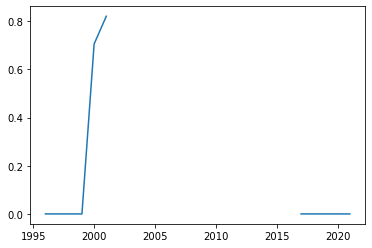

In [167]:
plt.plot(sumflow['ratio'])

/tmp/ipykernel_12295/3660129582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumflow['ratio'][wy] = runoffratio


In [146]:
sumprecip = allprecip[1] * 31.2 * (1000**4) ## year precip, times seconds in a month, 31.2 km
## mm^3/yr
sf_out = sumflow.loc[sumflow.wy==2001].sumflow.values[0]* 2.832e7
## cubic feet / yr * mm^3/cf*= mm^3/yr
sf_out/(sumprecip)

0.820833598971434

In [26]:
basin_elev = rxr.open_rasterio(homedir + 'data/dem/dem'+id+'.tif')
## now bin by elevation
yr = 2005
mo = 1

def closest_value(input_list, input_value):
  arr = np.asarray(input_list)
  i = (np.abs(arr - input_value)).argmin()
 
  return i

years = np.arange(2000,2003)
months = np.arange(1,13)

midx = pd.MultiIndex.from_product([years, months])
cols = ['lat','lon','precip','elev']

df = pd.DataFrame(index = midx,columns=cols)
for yr in years:
  for mo in months:
    lats = []
    lons = []
    precips = []
    elevs = []
    data = rxr.open_rasterio(datapath + 'clipped_'+id+'_ppt_'+str(yr)+'_'+str(mo)+'.tif')
    for ix in range(len(data.x)):
        for iy in range(len(data.y)):
            tlat = float(data.y[iy].values)
            tlon = float(data.x[ix].values)
            val = data.values[0][iy,ix]
            telev = float(basin_elev[0][closest_value(basin_elev.y,tlat)][closest_value(basin_elev.x,tlon)].values)
            lats.append(tlat)
            lons.append(tlon)
            precips.append(val)
            elevs.append(telev)

    df['lat'][yr,mo] = lats
    df['lon'][yr,mo] = lons
    df['precip'][yr,mo] = precips
    df['elev'][yr,mo] = elevs

min_elev = np.nanmin(basin_elev)
max_elev = np.nanmax(basin_elev)
elevations = np.linspace(min_elev,max_elev,30)
    


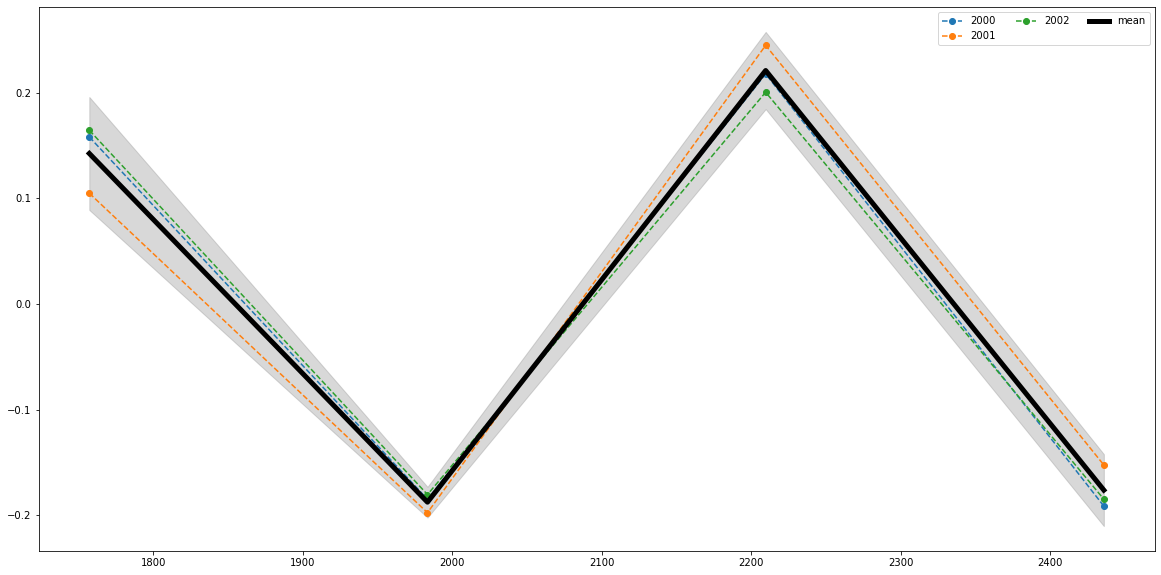

In [32]:
from scipy.stats import binned_statistic
from scipy import signal
fig,ax=plt.subplots(figsize=(20,10))
nbins= 4
tmp = []

test = list(years)
test = [2000 ,2001, 2002] #,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
for yr in test:
    for mo in [1]:
        edat = df['elev'][yr,mo]
        pdat = df['precip'][yr,mo]
        mask = np.where(~np.isnan(pdat))[0]
        binned = binned_statistic(np.array(edat)[mask], np.array(pdat)[mask], statistic='mean', bins=nbins, range=None)
        x2 = [(binned.bin_edges[i]+binned.bin_edges[i+1])/2 for i in range(nbins)]
        y2 = binned.statistic
        y2_norm = [(val-np.nanmean(y2))/np.nanmean(y2) for val in y2]
        ax.plot(x2,y2_norm,'o--',label=str(yr))
        tmp.append(y2_norm)
        
means = np.nanmean(tmp,axis=0)
upper_ci = means + 2*np.nanstd(tmp,axis=0)
lower_ci = means - 2*np.nanstd(tmp,axis=0)
ax.plot(x2,means,'k-',label='mean',linewidth = 5)
ax.fill_between(x2,upper_ci,lower_ci,color='gray',alpha=0.3)
ax.legend(ncol=3)
plt.show()
## color of the line based on avg. temp or total precip
## snow-only, or rain vs. snow
## same graphic for SWE for each of the SNSR years -> streamflow from the specific gage that andrew mentioned in the email
## and for GPP with elev bands, norm by area

## total derv = sum/pi of partials, or PCA
## grid -> MARSS for the in-ts, or RF, or GAM, or leave one out

## check lundquist of 2019 model precip model paper

## send outline, time series, and cssl stuff to manuela



/tmp/ipykernel_489394/497037664.py:20: RuntimeWarning: invalid value encountered in double_scalars
  y2_norm = [(val-np.nanmean(y2))/np.nanmean(y2) for val in y2]
/tmp/ipykernel_489394/497037664.py:20: RuntimeWarning: invalid value encountered in double_scalars
  y2_norm = [(val-np.nanmean(y2))/np.nanmean(y2) for val in y2]


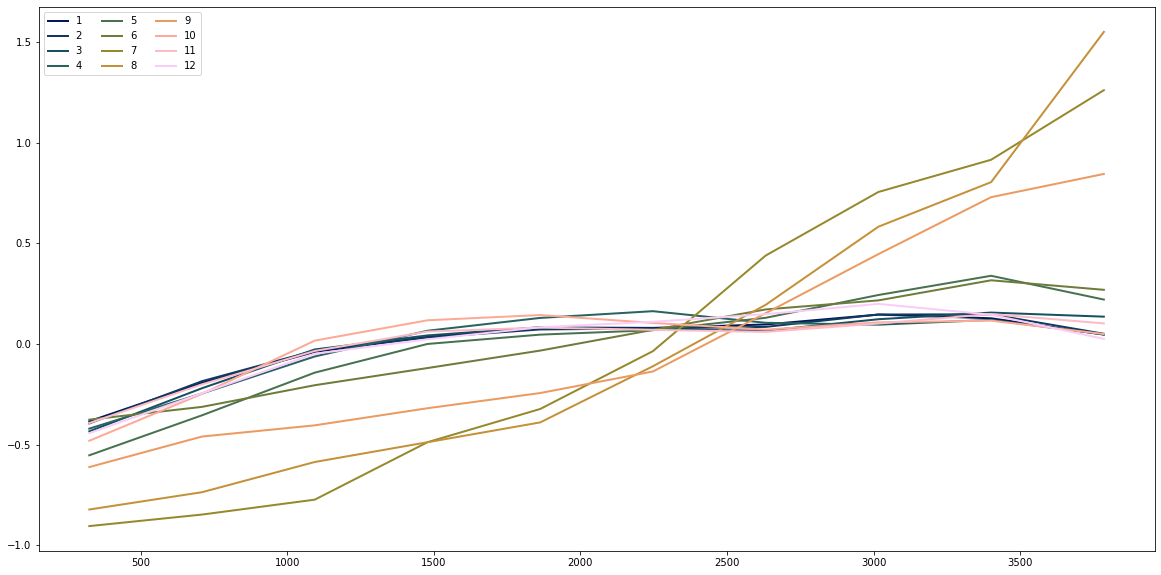

In [496]:
from scipy.stats import binned_statistic
from scipy import signal
fig,ax=plt.subplots(figsize=(20,10))
nbins=10
tmp = []
from cmcrameri import cm
colors = cm.batlow(np.linspace(0,1,12))

test = list(years)
test = [2000 ,2001,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
for mo in months:
    tmp = []
    for yr in years:
        edat = df['elev'][yr,mo]
        mask = np.where(~np.isnan(pdat))[0]
        pdat = df['precip'][yr,mo]
        binned = binned_statistic(np.array(edat)[mask], np.array(pdat)[mask], statistic='mean', bins=nbins, range=None)
        x2 = [(binned.bin_edges[i]+binned.bin_edges[i+1])/2 for i in range(nbins)]
        y2 = binned.statistic
        y2_norm = [(val-np.nanmean(y2))/np.nanmean(y2) for val in y2]
        #ax.plot(x2,y2_norm,'o--',label=str(yr))
        tmp.append(y2)
    tmp_norm = [(val-np.nanmean(tmp))/np.nanmean(tmp) for val in tmp]
    means = np.nanmean(tmp_norm,axis=0)
    upper_ci = means + 2*np.nanstd(tmp,axis=0)
    lower_ci = means - 2*np.nanstd(tmp,axis=0)
    ax.plot(x2,means,label=str(mo),linewidth = 2,color=colors[mo-1])
    #ax.fill_between(x2,upper_ci,lower_ci,color='gray',alpha=0.3)
ax.legend(ncol=3)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'concat'

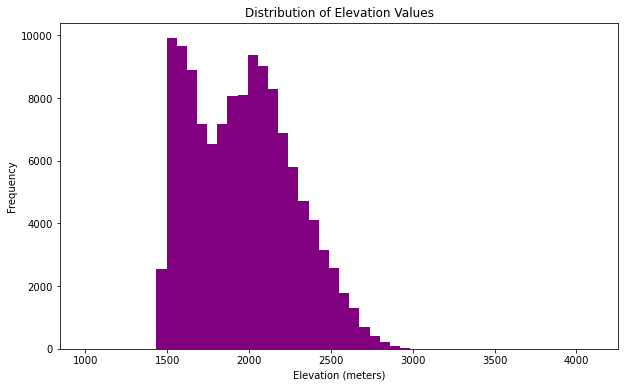

In [34]:
f, ax = plt.subplots(figsize=(10, 6))
basin_elev.rio.clip(basin.geometry).plot.hist(ax=ax,
                       color="purple",
                       range = (1000,4100),
                       bins=50)
ax.set(title="Distribution of Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()


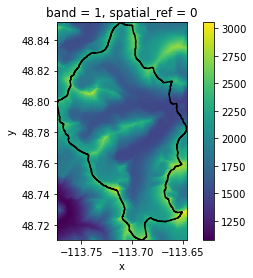

In [41]:
fig,ax=plt.subplots()
basin_elev.plot(ax=ax)
basin.boundary.plot(ax=ax,color='k')
plt.show()


In [186]:
prism_save = xr.DataArray(tmp1, dims=('y', 'x'), 
              coords={'x': cliplons, 'y': cliplats})
prism_save = prism_saveprism_path = get_prism_monthly_single(variable='ppt', year=yr, month=mo, return_path=True)

        prism_nodata = -9999
        
        prism_ds = gdal.Open(prism_path)
        prism_band = prism_ds.GetRasterBand(1)
        prism_array = prism_band.ReadAsArray().astype(np.float32)
        prism_array[prism_array == prism_nodata] = np.nan
        src=prism_ds
        prism_ds = None
        ext=GetExtent(src)
        lons = (np.linspace(ext[0][0],ext[0][1],c+1))
        lats= np.linspace(ext[1][0],ext[1][1],r+1)[::-1]
        min_lon = bounds.minx.values[0]
        max_lon = bounds.maxx.values[0]
        min_lat = bounds.miny.values[0]
        max_lat = bounds.maxy.values[0]
        tmp = prism_array[(lats>min_lat) &  (lats<max_lat)]
        tmp1 = tmp[0:18,(lons>min_lon) &  (lons<max_lon)]
        cliplons = lons[(lons>min_lon) &  (lons<max_lon)]
        cliplats = lats[(lats>min_lat) &  (lats<max_lat)]
        prism_save = xr.DataArray(tmp1, dims=('y', 'x'), 
                    coords={'x': cliplons, 'y': cliplats})
        prism_save = prism_save.rio.write_crs('epsg:4326')
        prism_clipped = prism_save.rio.clip(sj_basin.geometry,all_touched=True)
        prism_clipped.rio.to_raster(datapath + 'clipped_sj_ppt_'+str(yr)+'_'+str(mo)+'.tif')
prism_save.rio.write_crs('epsg:4326')
prism_clipped = prism_save.rio.clip(sj_basin.geometry,all_touched=True)

<AxesSubplot:title={'center':'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

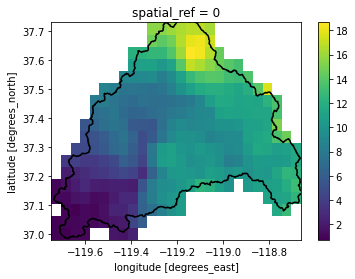

In [193]:
fig,ax= plt.subplots()
prism_save.rio.clip(sj_basin.geometry,all_touched=True).plot(ax=ax)
sj_basin.boundary.geometry.plot(ax=ax,color='k')